<a href="https://colab.research.google.com/github/deepthi18/Image-Classification-CIFAR10/blob/master/CNN_and_LeNet(CPU)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
import torchvision 
import torchvision.transforms as transforms
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

In [0]:
classes=("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")

In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [6]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)
print(images[0].shape)
print(labels[0].shape)
print(labels.shape)

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([])
torch.Size([4])


In [7]:
print(type(images[0]))

<class 'torch.Tensor'>


In [0]:
img=images[0]


In [0]:
npimg=img.numpy()

In [10]:
npimg.shape

(3, 32, 32)

In [0]:
npimg=np.transpose(npimg,(1,2,0))

In [12]:
print(npimg.shape)

(32, 32, 3)


In [13]:
plt.figure(figsize=(1,1))

<Figure size 72x72 with 0 Axes>

<Figure size 72x72 with 0 Axes>

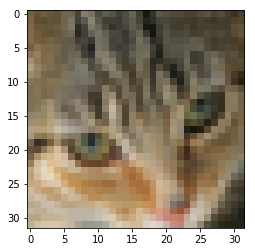

In [14]:
plt.imshow(npimg)
plt.show()

In [0]:
#imshow overriding
def imshow(img):
  npimg=img.numpy()
  npimg=np.transpose(npimg,(1,2,0))
  plt.figure(figsize=(1,1))
  plt.imshow(npimg)
  plt.show()

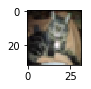

In [16]:
imshow(images[3])

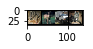

cat deer truck cat


In [17]:
imshow(torchvision.utils.make_grid(images))
print(" ".join(classes[labels[j]] for j in range(4)))

In [0]:
#single convolutional network
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3)#padding=(1,1) stride=(2,2)
    
  def forward(self,x):
    x=self.conv1(x)
    return x
    
    
  

In [0]:
net=FirstCNN()

In [0]:
out=net(images)

In [21]:
out.shape


torch.Size([4, 16, 30, 30])

In [22]:
for params in net.parameters():
  print(params.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [23]:
out1=out[0,0,:,:].detach().numpy()
print(out1.shape)


(30, 30)


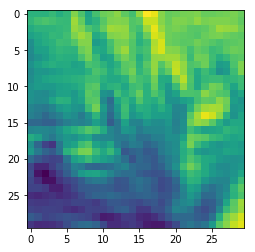

In [24]:
plt.imshow(out1)
plt.show()

In [0]:
#deep cnn
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.conv1=nn.Sequential(nn.Conv2d(3,8,3),nn.Conv2d(8,16,3))#padding=(1,1) stride=(2,2)
    
  def forward(self,x):
    x=self.conv1(x)
    return x
    


In [0]:
net2=FirstCNN_v2()

In [0]:
out1=net2(images)

In [28]:
out1.shape

torch.Size([4, 16, 28, 28])

<function matplotlib.pyplot.show>

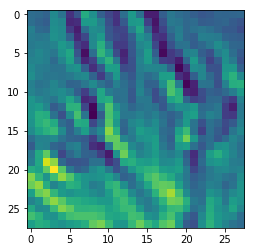

In [29]:
out11=out1[0,0,:,:].detach().numpy()
plt.imshow(out11)
plt.show

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.conv1=nn.Sequential(nn.Conv2d(3,6,5),
                             nn.AvgPool2d(2,stride=2),
                             nn.Conv2d(6,16,5),
                            nn.AvgPool2d(2,stride=2))#padding=(1,1) stride=(2,2)
    
  def forward(self,x):
    x=self.conv1(x)
    return x

In [0]:
net3=FirstCNN_v3()

In [0]:
out3=net3(images)

In [33]:
out3.shape

torch.Size([4, 16, 5, 5])

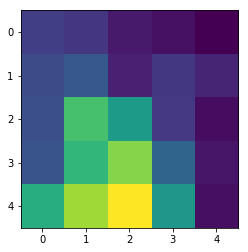

In [34]:
plt.imshow(out3[0,0,:,:].detach().numpy())
plt.show()

In [0]:
#lenet
class FirstCNN_v4(nn.Module):
  def __init__(self):
    super(FirstCNN_v4,self).__init__()
    self.cnn1=nn.Sequential(nn.Conv2d(3,6,5),
                             nn.Tanh(),
                             nn.AvgPool2d(2,stride=2),
                             
                             nn.Conv2d(6,16,5),
                             nn.Tanh(),
                            nn.AvgPool2d(2,stride=2))#padding=(1,1) stride=(2,2)
    #flattened layer
    self.fc_model=nn.Sequential(nn.Linear(400,120),
                               nn.Tanh(),
                               nn.Linear(120,84),
                               nn.Tanh(),
                               nn.Linear(84,10))
    
  def forward(self,x):
    print(x.shape)
    x=self.cnn1(x)
    print(x.shape)
    x=x.view(x.size(0),-1)
    print(x.shape)
    x=self.fc_model(x)
   
    return x


In [36]:
net4=FirstCNN_v4()
out4=net4(images)

print(out4)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
tensor([[ 0.0084,  0.1024,  0.0455, -0.0922,  0.0141, -0.0107, -0.0546, -0.1299,
          0.0192, -0.0768],
        [ 0.0260,  0.0980,  0.0589, -0.0933,  0.0282, -0.0068, -0.0721, -0.1177,
         -0.0036, -0.0745],
        [ 0.0138,  0.0814,  0.0438, -0.1185,  0.0190,  0.0095, -0.0331, -0.1396,
          0.0281, -0.1006],
        [ 0.0159,  0.1009,  0.0476, -0.0941,  0.0117, -0.0090, -0.0467, -0.1280,
          0.0119, -0.0888]], grad_fn=<AddmmBackward>)


In [37]:
max_values, pred_class = torch.max(out4.data, 1)
print(pred_class)

tensor([1, 1, 1, 1])


Training **cnn**

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [52]:
#training lenet
batch_size=128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net4(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net4=LeNet()

In [0]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net4.parameters())

Epoch: 0/16, Test acc: 38.40, Train acc: 37.91
Epoch: 1/16, Test acc: 43.09, Train acc: 43.63
Epoch: 2/16, Test acc: 47.93, Train acc: 47.95
Epoch: 3/16, Test acc: 49.04, Train acc: 50.19
Epoch: 4/16, Test acc: 50.95, Train acc: 52.58
Epoch: 5/16, Test acc: 52.25, Train acc: 54.90
Epoch: 6/16, Test acc: 52.78, Train acc: 56.38
Epoch: 7/16, Test acc: 53.52, Train acc: 57.87
Epoch: 8/16, Test acc: 54.09, Train acc: 58.69
Epoch: 9/16, Test acc: 54.39, Train acc: 60.38
Epoch: 10/16, Test acc: 54.54, Train acc: 60.57
Epoch: 11/16, Test acc: 54.95, Train acc: 62.27
Epoch: 12/16, Test acc: 55.51, Train acc: 63.19
Epoch: 13/16, Test acc: 55.88, Train acc: 64.21
Epoch: 14/16, Test acc: 55.18, Train acc: 64.42
Epoch: 15/16, Test acc: 56.26, Train acc: 65.12


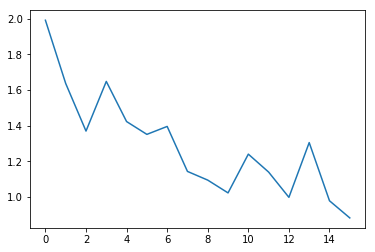

CPU times: user 8min, sys: 15.3 s, total: 8min 16s
Wall time: 8min 17s


In [61]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net4(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [63]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.26, Train acc: 65.12
